In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from sympy import *
import sympy
from sympy import simplify
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import math
import time

In [12]:
#Initialing the Matrix and Vector for the given system of equations
A = np.array([[2,-3,1],
              [3,-5,1],
              [0,2,-3]])
b = np.array([[2],
              [0],
              [1]])

ics= np.array([[1],
                   [1],
                   [1]])
lim = 1000

def decompose(A):
    L = np.zeros((len(A),len(A)))
    U =np.zeros((len(A),len(A)))
    for i in range(len(A)):
        for j in range(len(A)):
            if i<j:
                U[i][j]= A[i][j]
    #We make the upper and lower triangluar matrices needed and then we invert the lower one
    #so that its more easily used in the next function
    L = np.linalg.inv(A-U)            
    return L,U

def seidelsol(A,b,n,incond): #The incond and b arrays must be vertival vector arrays
    #Initializing all the neccesary functions. the sol array will store the solutions after n iterations
    solutions = np.zeros((n,len(b)))
    Lprime= decompose(A)[0]
    U = decompose(A)[1]
    solutions[0] = incond.flatten()
    
    for iteration in range(1,n,1):
        prevsol = solutions[iteration-1].reshape(len(b),1) #We have to reshape the arrays from 1xlen(b) to len(b)X1
        newsol = Lprime @(b-U@prevsol) #This implementation using matrices is far easier and more compact
        solutions[iteration] = newsol.copy().flatten()
    return solutions

found = seidelsol(A,b,lim,ics)
print((A@found[lim-1])-b.flatten())
print(b)

[0. 0. 0.]
[[2]
 [0]
 [1]]


In [13]:
#Askhsh 2
#Initializing the matrices
n = 10
Hilbert_A = np.zeros((n,n))

vec_a = np.zeros((n,1))
for i in range(n):
    for j in range(n):
        Hilbert_A[i][j]= 1/(i+j+1)

#It may seem that the formula is not the same but its due to the fact that
#python arrays start 0 instead of 1
np.set_printoptions(precision=4, suppress=True)

for i in range(n):
    vec_a[i][0]=i+1
vec_b = Hilbert_A @ vec_a
print(vec_b)
print(Hilbert_A)

[[10.    ]
 [ 7.9801]
 [ 6.7936]
 [ 5.9596]
 [ 5.3271]
 [ 4.8255]
 [ 4.4156]
 [ 4.0731]
 [ 3.782 ]
 [ 3.5311]]
[[1.     0.5    0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1   ]
 [0.5    0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909]
 [0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833]
 [0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769]
 [0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714]
 [0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714 0.0667]
 [0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714 0.0667 0.0625]
 [0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714 0.0667 0.0625 0.0588]
 [0.1111 0.1    0.0909 0.0833 0.0769 0.0714 0.0667 0.0625 0.0588 0.0556]
 [0.1    0.0909 0.0833 0.0769 0.0714 0.0667 0.0625 0.0588 0.0556 0.0526]]


In [5]:
#Helpful functions
def rowadd(A, I , J , a  ):
    for i in range(0,len(A[0]),1):
        A[J][i] = A[J][i]+a*A[I][i]
    return A
#These variables represent the matrix we want to change , I and J is the index of the rows , 
#and a is a scalar quantity by which we multiply the first row

#The same thing but for columns
def coladd(A, I , J , a  ):
    for i in range(0,len(A),1):
        A[i][J] = A[i][J]+a*A[i][I]
    return A

def normalize(A,b):
    for i in range(0,len(A),1):
        norm = A[i][i]
        for j in range(0,len(A[0]),1):
            A[i][j] = A[i][j]/norm
        b[i][0]=b[i][0]/norm
    return A,b    
#This function renders the diagonals of a matrix 1, by scaling all the rows appropriately


In [6]:
#Implementing the Gauss solving method
A = Hilbert_A #The matrix of the system
b = vec_b #The vector of the constant coefficients
def Gausselim(A,b): #This algorithm manages to produce a final upper triangular matrix using the appropriate
    #algebra demanded by Gauss elimination
    for index in range(0,len(A),1):
        for k in range(1,len(A)-index,1):
            solvparam = -A[index+k][index]/A[index][index]
            rowadd(A, index, index + k, solvparam) 
            rowadd(b,index,index+k,solvparam)     
    return A,b  
np.set_printoptions(precision=4, suppress=True)
#Now to clear all the elements that are not on the diagonals , and normalize the arrays so that the solutions are easily
#found
def Gaussreverse(matr , vec):
    for index in range(len(A)-1,-1,-1):
        for k in range(index-1,-1,-1):
            solvparam = -A[k][index]/A[index][index]
            rowadd(A, index,  k, solvparam) 
            rowadd(b,index, k,solvparam)
    return normalize(A,b)
#Putting together the last two functions into a single one
def Gausssol(A,b):
    matr = Gausselim(A,b)[0] 
    vec  = Gausselim(A,b)[1]
    return Gaussreverse(matr,vec)[0] @ Gaussreverse(matr,vec)[1]
numsol = Gausssol(A,b)
print(numsol)
#Using the initial and final array to find the error between them.
def error(x, x_num):
    err = np.linalg.norm(x-x_num)/np.linalg.norm(x)
    return err
print(error(vec_a,numsol))

[[1.    ]
 [2.    ]
 [3.    ]
 [3.9999]
 [5.0006]
 [5.9983]
 [7.0027]
 [7.9974]
 [9.0014]
 [9.9997]]
0.00022570508015889318


In [7]:
#Askhsh 3
matrA = np.array([[1,3,5],
                 [2,4,6],
                 [3,5,7]])
itera = 3
ind = 2
vec = np.array(())
x = np.array([[1],
             [2],
              [3]])
#Again we shall use recursion
def pwrsolve(A,x,n): #It will return A^n * b matrix multiplication
    if n==1:#The condition that breaks the recursion
        return A @ x
    return A @ pwrsolve(A,x,n-1)

def showpwr(matrA , x,itera, ind, flag=0):
    eigenval = pwrsolve(matrA,x,itera+1)[ind][0]/pwrsolve(matrA,x,itera)[ind][0]
    vec = pwrsolve(matrA,x,itera+1)
    vec = vec/np.linalg.norm(vec)
    print("The matrix multiplication between the matrix and the vector is:\n" + str(matrA @ vec))
    print("The scaled vector is:\n" + str(vec * eigenval))
    print("Therefore the eigenvalue is:" + str(eigenval))
    print("The whole process has an error of:" + str(error(matrA @ vec , vec*eigenval)))
    if flag ==1: #This line is written specifically for the second question on that exercise
        print("Therefore then smallest eigenvalue for the starting matrix is:" +str(1/eigenval))
    return 0
#To find the smallest eigenvalue we can use the theorem , that the inverse matrix has inverse eigenvalue. Thus ,
#the smallest eigenvalue of the matrA becomes the largest eigen value for its inverse
invmatrA = np.linalg.inv(matrA)
showpwr(matrA,x,itera,ind)
print("Now for the inverse matrix")
print("-------------------")
showpwr(invmatrA,x,itera,ind,flag=1)
print("The smallest eigenvalue is practically zero")

The matrix multiplication between the matrix and the vector is:
[[5.6319]
 [7.3336]
 [9.0354]]
The scaled vector is:
[[5.6321]
 [7.334 ]
 [9.0359]]
Therefore the eigenvalue is:12.92887029288703
The whole process has an error of:5.091751716924704e-05
Now for the inverse matrix
-------------------
The matrix multiplication between the matrix and the vector is:
[[-4.1368e+15]
 [ 8.2736e+15]
 [-4.1368e+15]]
The scaled vector is:
[[-4.1368e+15]
 [ 8.2736e+15]
 [-4.1368e+15]]
Therefore the eigenvalue is:1.0133099161583616e+16
The whole process has an error of:1.1033485125543436e-16
Therefore then smallest eigenvalue for the starting matrix is:9.868649107779169e-17
The smallest eigenvalue is practically zero


The fitting using the Lagrangian approach results in the following polynomial
-4.94944215599491*k**3 - 1.1329537866379*k**2 + 4.84818532907929*k + 5.0
The error in point -1 is 0
The error in point 0 is 0
The error in point 1 is 0
The error in point 2 is 3.55271367880050e-15
-------------------------------------
The fitting using the Hermitian functions results in the following polynomial
-0.23042616240347*k**3 + 1.12043385229506*k**2 - 0.716621460338617*k + 3.79491681072474
The error in point -1 is 1.89409524548417
The error in point 0 is 1.20508318927526
The error in point 1 is 0.202513653831225
The error in point 2 is 34.4309817363523


The Lagrangian approach
The error in point 1.5 is 3.34076559062568
The Hermitian approach
The error in point 1.5 is 8.10374220194246


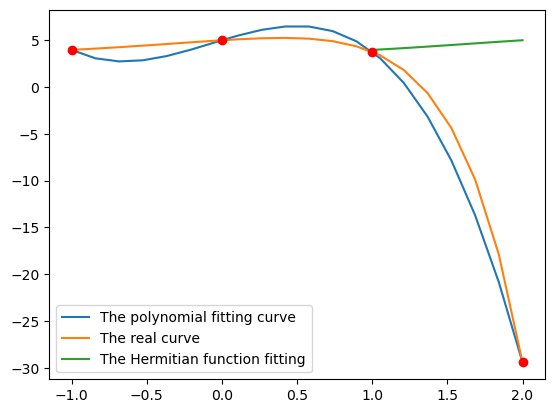

In [8]:
#Askhsh 4
#The scipy library is used to make the method more general
k = symbols('k')
f = 3*exp(k)-exp(2*k)+3
xvalues = np.array([i for i in range(-1,3,1)])
hermxvalues =xvalues[2::] #Getting only the values 1,2 in a bit of a fancy way
single = np.array([1.5])

#Making the Lambda function as stated by Lagrange .I used lamda becuase lambda is already protected by python
def lamda(j,xdata):
    num = 1
    den = 1
    for i in range(0,len(xdata)):
        if(i != j):
            num *= (k-xdata[i])
            den *= (xdata[j]-xdata[i])
    return num/den
#The Lagrange polynomial
def poly(xdata):
    fvalues = np.array([f.subs(k,val).evalf() for val in xvalues])
    sum = 0
    for i in range(0,len(xdata)):
        sum += fvalues[i]*lamda(i,xdata)
    return simplify(sum)

def error(xdata,function,xarr): #The data we want to find the error to, the function and lastly the fitting data used to make 
#the fitting polynomial
    pol = function(xarr)
    for i,val in enumerate(xdata):
        print("The error in point " + str(val) + " is " + str(abs(pol.subs(k,val).evalf()-f.subs(k,val).evalf())))
    pass
print('The fitting using the Lagrangian approach results in the following polynomial')
print( '\033[91m' +str(poly(xvalues))+ '\033[0m')
error(xvalues,poly,xvalues)
print('-------------------------------------')

#Hermite
def Afunc(j, xdata):
    return (1-2*(k-xdata[j])*diff(lamda(j,xdata),k).subs(k,xdata[j]).evalf())*(lamda(j,xdata)**2)
#The A and B functions are used to make code more readable
def Bfunc(j,xdata):
    return (k-xdata[j])*(lamda(j,xdata)**2)
#The Hermitian lagrangian
def herm(xdata):
    fvalues = np.array([f.subs(k,val).evalf() for val in xvalues])
    fprimevalues = np.array([diff(f,k).subs(k,val).evalf() for val in xvalues])
    sum =0
    for i in range(len(xdata)):
        sum += Afunc(i,xdata)*fvalues[i]+Bfunc(i,xdata)*fprimevalues[i]
    return simplify(sum)

print('The fitting using the Hermitian functions results in the following polynomial')
print( '\033[91m' +str(herm(hermxvalues))+ '\033[0m')
error(xvalues,herm,hermxvalues)
print('\n')
print('The Lagrangian approach')
error(single,poly,xvalues)
print('The Hermitian approach')

error(single,herm,hermxvalues)
xmap = np.linspace(-1,2,20)
hermxmap = np.linspace(1,2,20)
polmap = np.array([poly(xvalues).subs(k,val).evalf() for val in xmap])
fmap = np.array([f.subs(k,val).evalf() for val in xmap])
hermmap = np.array([herm(hermxvalues).subs(k,val).evalf() for val in hermxmap])
stand_out_y = np.array([f.subs(k,val).evalf() for val in xvalues])

plt.plot(xmap , polmap, label = 'The polynomial fitting curve')
plt.plot(xmap , fmap, label = 'The real curve')
plt.plot(hermxmap , hermmap, label = 'The Hermitian function fitting')
plt.plot(xvalues, stand_out_y, 'ro') #Making the values of interest to stand out
plt.legend(loc='lower left')
plt.show()